# Annotating trees with NCBI Taxonomy information

## Relevant documentation:
- [ete3 ncbiquery command line tool ](http://etetoolkit.org/documentation/ete-ncbiquery/)
- [ete ncbiquery API module](http://etetoolkit.org/docs/latest/tutorial/tutorial_ncbitaxonomy.html)

ETE provides bindings to the NCBI Taxonomy database. For this, it downloads the latest NCBI db version, parses relevant information, and store it in ETE format.

The first you use this feature, the database will be downloaded and parsed.

## Command line use

### TASK: Get the full taxonomic lineage of each species included in our analysis

Let's first extract the list of taxids

In [23]:
# extract all sequence names, remove '>' symbols, split by '.' to get spcode and deduplicate names
!grep '>' data/all_prots.faa|cut -f1 -d'.'|tr '>' '\r'|sort -u > target_taxa


Now we can just call ete3 ncbiquery with the `--info` option 

In [28]:
cat target_taxa |ete3 ncbiquery --info |head -n3

# Taxid	Sci.Name	Rank	Named Lineage	Taxid Lineage
224324	Aquifex aeolicus VF5	strain	root,cellular organisms,Bacteria,Aquificae,Aquificae,Aquificales,Aquificaceae,Aquifex,Aquifex aeolicus,Aquifex aeolicus VF5	1,131567,2,200783,187857,32069,64898,2713,63363,224324
263820	Picrophilus torridus DSM 9790	strain	root,cellular organisms,Archaea,Euryarchaeota,Diaforarchaea group,Thermoplasmata,Thermoplasmatales,Picrophilaceae,Picrophilus,Picrophilus torridus,Picrophilus torridus DSM 9790	1,131567,2157,28890,2283796,183967,2301,46630,46631,82076,263820


Or download the taxonomy tree connecting our reference species with the `--tree` option

In [4]:
# remember to exclude our strain, which has a wrong NCBI taxid
!cat target_taxa|grep -v '224324999'| ete3 ncbiquery --tree|ete3 view -i data/taxonomy_tree.png --ncbi


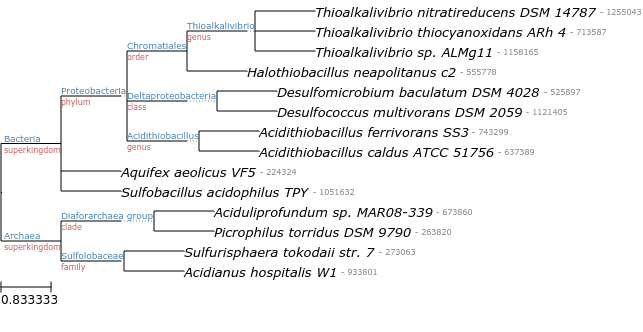

In [5]:
from IPython.display import Image
display(Image("data/taxonomy_tree.png"))

## Programmatic use

In [1]:
# Load Trees
import pickle
def extract_spcode(nodename):
    return nodename.split('.')[0]

all_trees = pickle.load(open('data/alltrees.pkl', 'rb'))
print("Trees loaded:", len(all_trees))

Trees loaded: 2601


In [14]:
tree = all_trees["224324999.sul455"]

tax2name, tax2lineage, tax2rank = tree.annotate_ncbi_taxa()


In [19]:
for n in tree.traverse():
    print(n.taxid, n.sci_name,n.taxid, n.named_lineage, n.rank)
    

   [''] Unknown
106633 Thioalkalivibrio 106633 ['root', 'cellular organisms', 'Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Chromatiales', 'Ectothiorhodospiraceae', 'Thioalkalivibrio'] genus
   [''] Unknown
1255043 Thioalkalivibrio nitratireducens DSM 14787 1255043 ['root', 'cellular organisms', 'Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Chromatiales', 'Ectothiorhodospiraceae', 'Thioalkalivibrio', 'Thioalkalivibrio nitratireducens', 'Thioalkalivibrio nitratireducens DSM 14787'] strain
713587 Thioalkalivibrio thiocyanoxidans ARh 4 713587 ['root', 'cellular organisms', 'Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Chromatiales', 'Ectothiorhodospiraceae', 'Thioalkalivibrio', 'Thioalkalivibrio thiocyanoxidans', 'Thioalkalivibrio thiocyanoxidans ARh 4'] strain
131567 cellular organisms 131567 ['root', 'cellular organisms'] no rank
   [''] Unknown
1051632 Sulfobacillus acidophilus TPY 1051632 ['root', 'cellular organisms', 'Bacteria', 'Terrabacteria group', 'Firmic

Note in the previous output that some nodes are labeled as Unknown because one taxid is not found (our strain). We can easly hack this out on the fly.

In [23]:
# Load Trees
import pickle
def extract_spcode(nodename):
    spcode = nodename.split('.')[0]
    if spcode == '224324999':       # We make our strain look as an Aquifex ref. taxa
        return '224324'
    return spcode

all_trees = pickle.load(open('data/alltrees.pkl', 'rb'))
print("Trees loaded:", len(all_trees))

Trees loaded: 2601


Now all nodes in the tree are annotated

In [22]:
tree = all_trees["224324999.sul455"]
tax2name, tax2lineage, tax2rank = tree.annotate_ncbi_taxa()
for n in tree.traverse():
    print(n.taxid, n.sci_name,n.taxid, n.named_lineage, n.rank)
    

131567 cellular organisms 131567 ['root', 'cellular organisms'] no rank
106633 Thioalkalivibrio 106633 ['root', 'cellular organisms', 'Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Chromatiales', 'Ectothiorhodospiraceae', 'Thioalkalivibrio'] genus
131567 cellular organisms 131567 ['root', 'cellular organisms'] no rank
1255043 Thioalkalivibrio nitratireducens DSM 14787 1255043 ['root', 'cellular organisms', 'Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Chromatiales', 'Ectothiorhodospiraceae', 'Thioalkalivibrio', 'Thioalkalivibrio nitratireducens', 'Thioalkalivibrio nitratireducens DSM 14787'] strain
713587 Thioalkalivibrio thiocyanoxidans ARh 4 713587 ['root', 'cellular organisms', 'Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Chromatiales', 'Ectothiorhodospiraceae', 'Thioalkalivibrio', 'Thioalkalivibrio thiocyanoxidans', 'Thioalkalivibrio thiocyanoxidans ARh 4'] strain
131567 cellular organisms 131567 ['root', 'cellular organisms'] no rank
2 Bacteria 2 ['root', '

And we can explore interactively. Note that all attributes can be obtained when clicking on nodes.

In [25]:
tree.show()

We can also export the annotate newick to visualize with `ete3 view`

In [32]:
tree.write(outfile="test_tree.nw", features=[])

In [36]:
!ete3 view --ncbi -t test_tree.nw -i test_tree.png

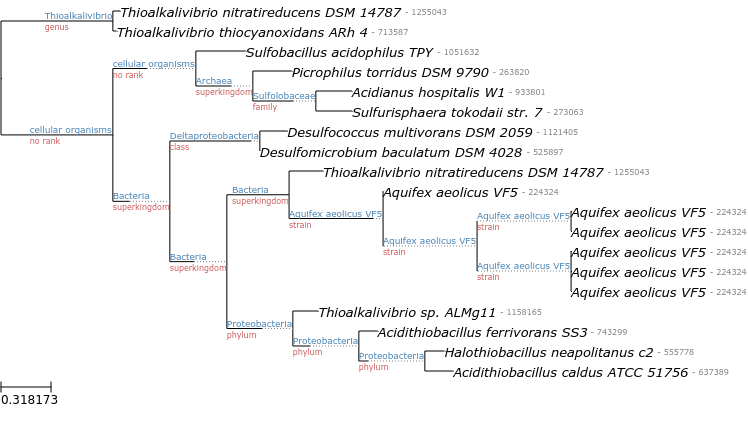

In [38]:
from IPython.display import Image
display(Image("test_tree.png"))